In [12]:
# cargan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc

In [13]:
# carga el archivo
data = pd.read_csv("D:/Datos/wine.csv",header=None,names=["clase","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"])

In [14]:
# visualiza el Archivo
data

,clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
# verifica filas y columnas
data.shape

(178, 14)

In [16]:
# analizamos informacion
data.describe()

,clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

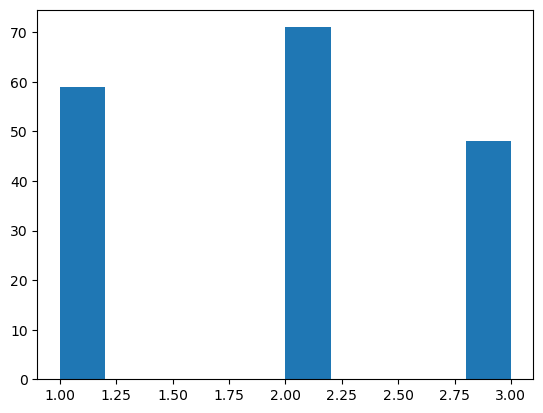

In [18]:
# cuantos elementos de cada clase?
plt.hist(data.clase)

In [19]:
# separamos dataset
predictors_col = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
target_col = ['clase']


In [20]:
# asignamos
predictors = data[predictors_col]
target = data[target_col]

In [21]:
# hacemos entrenamiento
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [22]:
# Creamos el árbol

tree = tree = DecisionTreeClassifier()

In [23]:
# Entrenamos el arbol de decisión
arbol = tree.fit(x_train, y_train)

[Text(0.5, 0.9285714285714286, 'x[12] <= 755.0\ngini = 0.659\nsamples = 142\nvalue = [47, 56, 39]'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 1.235\ngini = 0.501\nsamples = 88\nvalue = [2, 52, 34]'),
 Text(0.125, 0.6428571428571429, 'x[9] <= 3.56\ngini = 0.161\nsamples = 34\nvalue = [0, 3, 31]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.375, 0.6428571428571429, 'x[9] <= 7.7\ngini = 0.172\nsamples = 54\nvalue = [2, 49, 3]'),
 Text(0.3125, 0.5, 'x[12] <= 726.5\ngini = 0.075\nsamples = 51\nvalue = [2, 49, 0]'),
 Text(0.25, 0.35714285714285715, 'x[0] <= 13.175\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.3125, 0.21428571428571427, 'x[0] <= 13.365\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.375, 0.071428

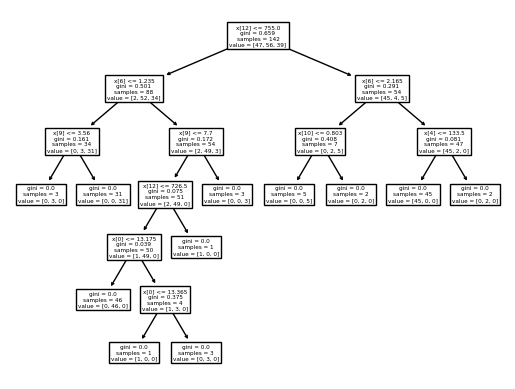

In [24]:
# Graficar el arbol de decisión
plot_tree(arbol)

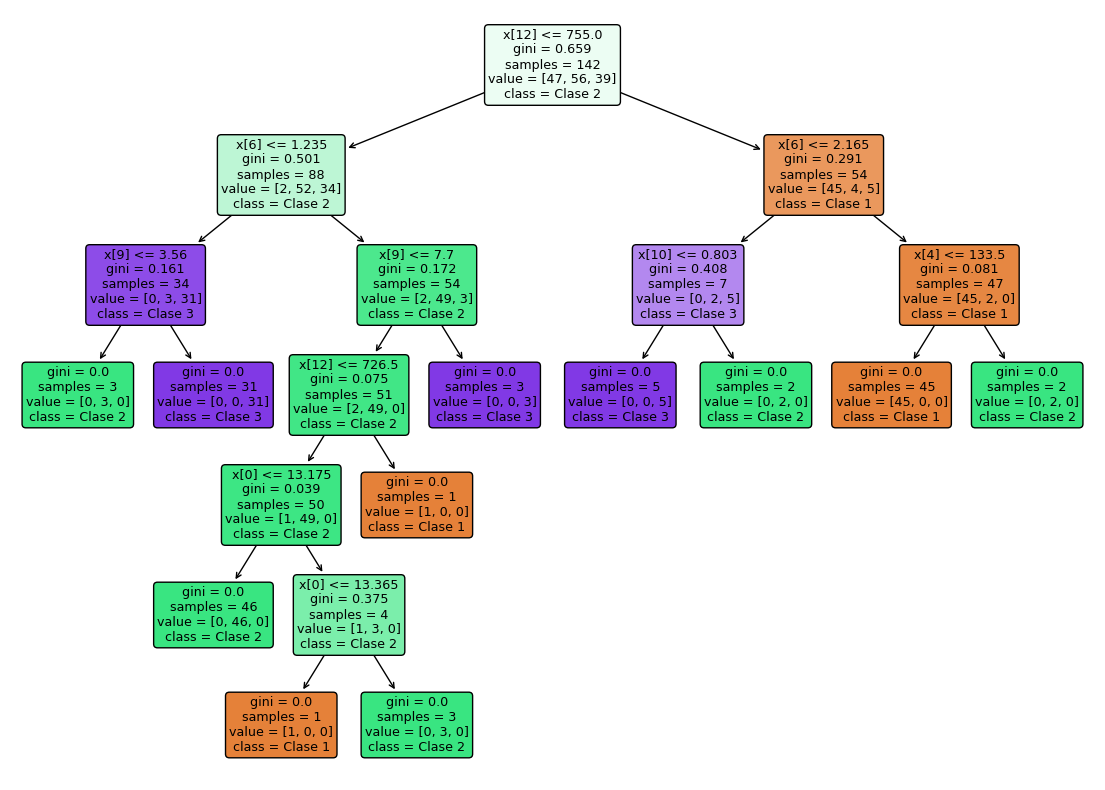

In [31]:
clases = ['Clase 1', 'Clase 2', 'Clase 3']
plt.figure(figsize=(14, 10))  
plot_tree(arbol, filled = True, class_names=clases, rounded = True)
plt.show()

In [32]:
# evaluar predicciones
predicciones = arbol.predict(x_test)

In [34]:
#Calculo de la matriz de confusion
conf_matrix = confusion_matrix(y_test, predicciones)

<Axes: >

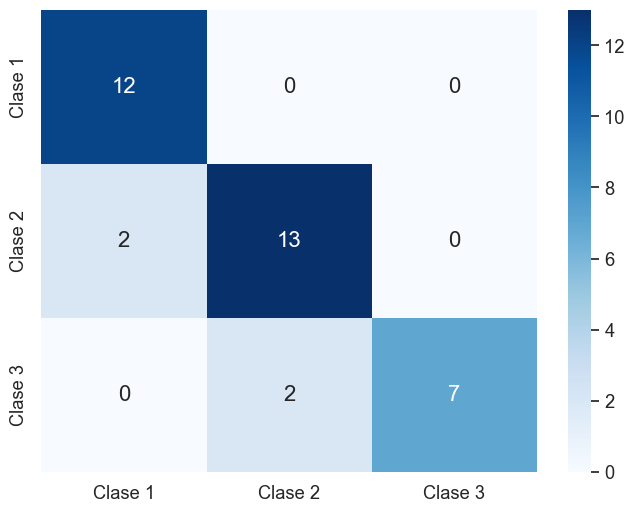

In [36]:
# Imprimir la matriz de confusion

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16},xticklabels=clases, yticklabels=clases)

In [43]:
# Calcular metricas de evaluación del modelo entrenado y imprimir

accuracy = accuracy_score(y_test, predicciones)
precision_none = precision_score(y_test, predicciones, average=None)
precision_macro = precision_score(y_test, predicciones, average='macro')
recall_none = recall_score(y_test, predicciones, average=None)
recall_macro = recall_score(y_test, predicciones, average='macro')
f1_none = f1_score(y_test, predicciones, average=None)
f1_macro = f1_score(y_test, predicciones, average='macro')

print("Metricas de rendimiento del modelo arbol de desicion")

print("")
print("Omar Velandia")
print("")
print(f'Exactitud: {accuracy * 100:.2f} %')

print("")
for i, precision in enumerate(precision_none):
    class_name = clases[i]
    print(f'Precision para {class_name}: {precision * 100:.2f} %')    
print(f"Precision (promedio): {precision_macro * 100:.2f} %")    

print("")    
for i, recall in enumerate(recall_none):
    class_name = clases[i]
    print(f'Recall para {class_name}: {recall * 100:.2f} %')    
print(f"Recall (promedio): {recall_macro * 100:.2f} %")   


print("")    
for i, f1 in enumerate(f1_none):
    class_name = clases[i]
    print(f'F1 Score para {class_name}: {f1 * 100:.2f} %')    
print(f"F1 Score (promedio): {f1_macro * 100:.2f} %") 

Metricas de rendimiento del modelo arbol de desicion

Omar Velandia

Exactitud: 88.89 %

Precision para Clase 1: 85.71 %
Precision para Clase 2: 86.67 %
Precision para Clase 3: 100.00 %
Precision (promedio): 90.79 %

Recall para Clase 1: 100.00 %
Recall para Clase 2: 86.67 %
Recall para Clase 3: 77.78 %
Recall (promedio): 88.15 %

F1 Score para Clase 1: 92.31 %
F1 Score para Clase 2: 86.67 %
F1 Score para Clase 3: 87.50 %
F1 Score (promedio): 88.82 %
